The aim of this notebook is to visualize the effects of some of the transformations.

In [1]:
import sys 
sys.path.append('..')

In [2]:
import matplotlib.pyplot as plt

from monai.data import DataLoader, Dataset
from monai.utils import first
from monai.transforms import (
    LoadImaged,
    Compose,
    CropForegroundd,
    EnsureChannelFirstd,
    ScaleIntensityRanged,
    Orientationd,
    Spacingd,
    ToTensord
)

from src.transforms import IoUCropd

In [3]:
data = [
    {
        'img': '../data/ssl/FLARETs_0047_0000.nii.gz',
        'my_key': 1
    },
    {
        'img': '../data/ssl/FLARETs_0048_0000.nii.gz',
        'my_key': 2
    },
    {
        'img': '../data/ssl/FLARETs_0049_0000.nii.gz',
        'my_key': 2
    }
]

In [12]:
transforms = Compose([
    LoadImaged(keys=['img']),
    EnsureChannelFirstd(keys=['img']),
    Orientationd(keys=['img'], axcodes='RAS'),
    Spacingd(keys=['img'], pixdim=(1, 1, 2.5), mode=('bilinear')),
    ScaleIntensityRanged(keys=['img'], a_min=-500, a_max=500,
                         b_min=0.0, b_max=1.0, clip=True),
    CropForegroundd(keys=['img'], source_key='img'),
    IoUCropd(keys=['img'], min_iou=0.6, max_iou=0.7, debug=True),
    # TODO: put augmentations here
    ToTensord(keys=['img1', 'img2'])
])

check_ds = Dataset(data=data, transform=transforms)
check_loader = DataLoader(check_ds, batch_size=1)

In [13]:
check_data = first(check_loader)
img = check_data['img'][0][0]

In [14]:
img.shape

torch.Size([316, 233, 188])

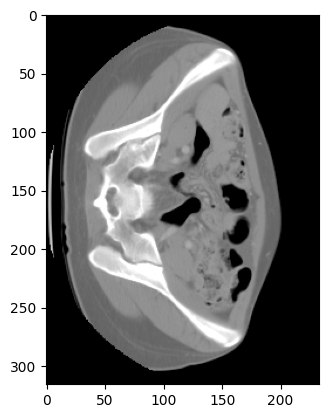

In [15]:
plt.imshow(check_data['img'][0][0][:, :, 48], cmap='gray', vmin=0, vmax=1)

[tensor([27]), tensor([3]), tensor([90]), tensor([123]), tensor([99]), tensor([186])]


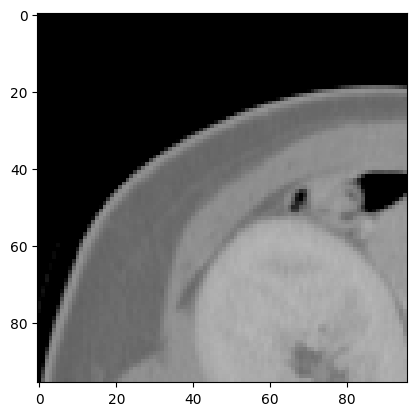

In [16]:
print(check_data['img1_coords'])
plt.imshow(check_data['img1'][0][0][:, :, 0], cmap='gray', vmin=0, vmax=1)

[tensor([33]), tensor([15]), tensor([83]), tensor([129]), tensor([111]), tensor([179])]


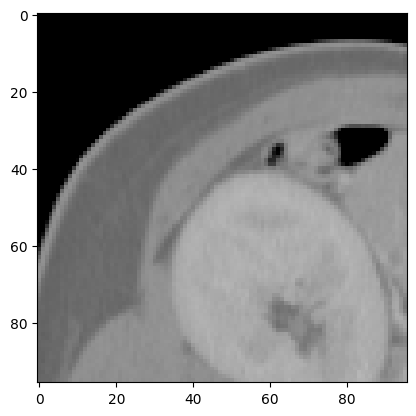

In [18]:
print(check_data['img2_coords'])
plt.imshow(check_data['img2'][0][0][:, :, 7], cmap='gray', vmin=0, vmax=1)